<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Model_WithoutKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow
from tensorflow.python.tools import inspect_checkpoint as ckpt 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
#FEATURES AND LABELS  
 
with open('/content/features_20_11.bin','rb') as file:
  f = pickle.load(file)
  
with open('/content/labels_20_11.bin','rb') as file:
  l = pickle.load(file)

In [3]:
print(np.shape(f))
print(type(f))

(2827, 10)
<class 'numpy.ndarray'>


In [0]:
features = []
labels = []

for i in f:
  features.append(list(map(float,i)))
for i in l:
  labels.append(list(map(float,i)))

In [0]:
x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
with open('/content/y_test_20_11.bin','wb') as file:
  pickle.dump(y_test_t,file)

with open('/content/x_test_20_11.bin','wb') as file:
  pickle.dump(x_test_t,file)

In [0]:
tf.reset_default_graph()

In [10]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17737214541548015203
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15900520749021586640
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9026511024522488674
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13992650723611649721
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [11]:
x = tf.placeholder(shape = (None,10), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

#Layer 1 
w1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((10, 15))), name = 'w1')
b1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,15))), name = 'b1')

#Layer2 

w2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((15,25))), name = 'w2')
b2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,25))), name = 'b2')

#out

wo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((25,1))), name = 'wo')
bo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,1))), name = 'bo')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
hidl1 = tf.add(tf.matmul(x,w1),b1, name ='hidden1')
hidl1 = tf.nn.relu(hidl1)
hidl2 = tf.add(tf.matmul(hidl1,w2),b2, name = 'hidden2')
hidl2 = tf.nn.relu(hidl2)
out = tf.add(tf.matmul(hidl2,wo),bo,name = 'output')


In [0]:
## MSE - Loss function
loss = tf.reduce_mean(tf.square(tf.subtract(y,out))) 

## Optimizer - Adam
opt = tf.train.AdamOptimizer(name = 'optimizer', learning_rate=0.005)
op_train = opt.minimize(loss, name ='train_op')


In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

18561.02	8300.593
45323.28	54362.703
44755.85	62153.855
36800.418	142943.05
54409.742	61184.5
28995.195	26748.914
34732.29	44188.22
46073.57	15237.807
35591.887	45709.15
12936.817	61629.062
46823.062	46611.7
19017.812	29832.662
71371.055	29499.447
38718.57	21514.053
41468.777	44377.85
67121.08	29346.398
41875.305	46157.047
27783.543	2358.4648
42618.688	16575.914
18350.04	61036.785
38972.94	13653.893
21656.527	50769.883
29071.584	50502.465
74957.016	23994.781
50119.004	33869.32
24524.305	34393.617
40310.16	2494.008
66423.48	71793.52
46334.074	58788.18
7691.959	61953.727
12302.121	89313.375
4205.26	1818.5664
19726.486	22987.846
48747.543	24354.79
16988.549	65247.203
28657.805	33373.375
19687.516	17426.676
51005.516	82073.03
32967.645	19316.008
29346.7	39735.914
29185.314	17114.094
23894.184	12532.654
28906.008	20646.281
29426.87	38231.305
23034.133	30482.242
35592.086	43296.703
74755.97	39627.625
22126.195	65851.01
41345.844	22705.863
24841.049	12748.52
22631.727	57951.215
69704.22	30736

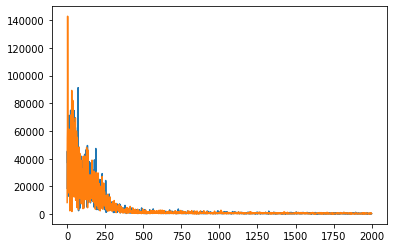

In [18]:

train=[]
val=[]

with tf.device('/device:CPU:0'):
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    #saved.restore(sess, "/content/final_check_weights.ckpt")
    mini =[]
    for i in range(2000):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
      
      #TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
      z= sess.run([loss,op_train, update_ops], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      
      ##VALIDATION LOSS
      
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    plt.plot(train)
    plt.plot(val)
    save_path = save.save(sess, "/content/final_20_11.ckpt")
    print('Saved model!')
    
 

In [19]:
val = []

with tf.Session() as sess:
    
    saver = tf.train.Saver()
    saver.restore(sess, '/content/final_20_11.ckpt')
    val.append(sess.run('output',feed_dict={x : x_batch}))
    


INFO:tensorflow:Restoring parameters from /content/final_20_11.ckpt


In [20]:
print(type(tf.get_default_graph().as_graph_def()))
tf.io.write_graph(tf.get_default_graph().as_graph_def(), '/content/', 'Final_20_11.pbtxt')

<class 'tensorflow.core.framework.graph_pb2.GraphDef'>


'/content/Final_20_11.pbtxt'

In [0]:
with open('/content/Final_20_11.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())
  